# Description

This notebook is used to analyze the sales data of a supermarket.

Analysis included:

* What sales channel has the most product purchases in each country?
* Which product categories generate the most revenue?
* In which countries are the majority of our customers located in?

## Import Packages

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [2]:
# Reading the csv file
df = pd.read_csv('data/marketing_data.csv')

In [3]:
# printing the head values of data frame
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
# structure of data frame rows x columns
df.shape

(2240, 28)

### Description about data

Column Details:

ID: Customer's Unique Identifier

Year_Birth: Customer's Birth Year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

MntWines: Amount spent on wine in the last 2 years

MntFruits: Amount spent on fruits in the last 2 years

MntMeatProducts: Amount spent on meat in the last 2 years

MntFishProducts: Amount spent on fish in the last 2 years

MntSweetProducts: Amount spent on sweets in the last 2 years

MntGoldProds: Amount spent on gold in the last 2 years

NumDealsPurchases: Number of purchases made with a discount

NumWebPurchases: Number of purchases made through the company's web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company's web site in the last month

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)

Complain: 1 if customer complained in the last 2 years, 0 otherwise

Country: Customer's location

In [5]:
# information of columns in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## Data Cleaning

In [6]:
# we have to modify Income column, so that we can perform further analysis
df.rename(columns={' Income ':'Income'},inplace=True)

In [7]:
# income should be converted to float and trim that column values.
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

In [8]:
# arranging the date in a structured format
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%m/%d/%y')

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Exploring the null values 

In [10]:
# number of nulls
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

* There are only 24 null values in the Income column. I am trying to visuaize using different graphs.

<AxesSubplot:>

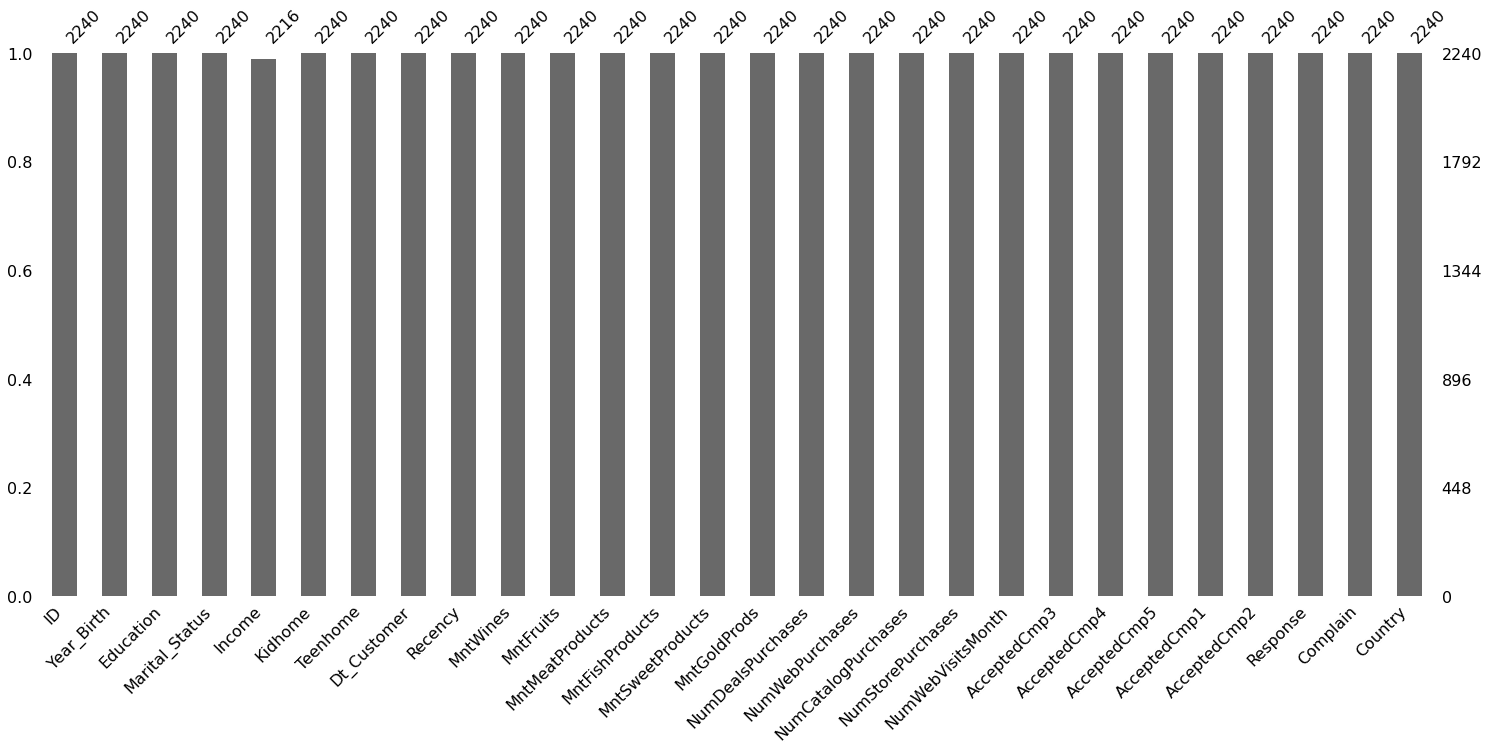

In [11]:
# bar plot
msno.bar(df)

<AxesSubplot:>

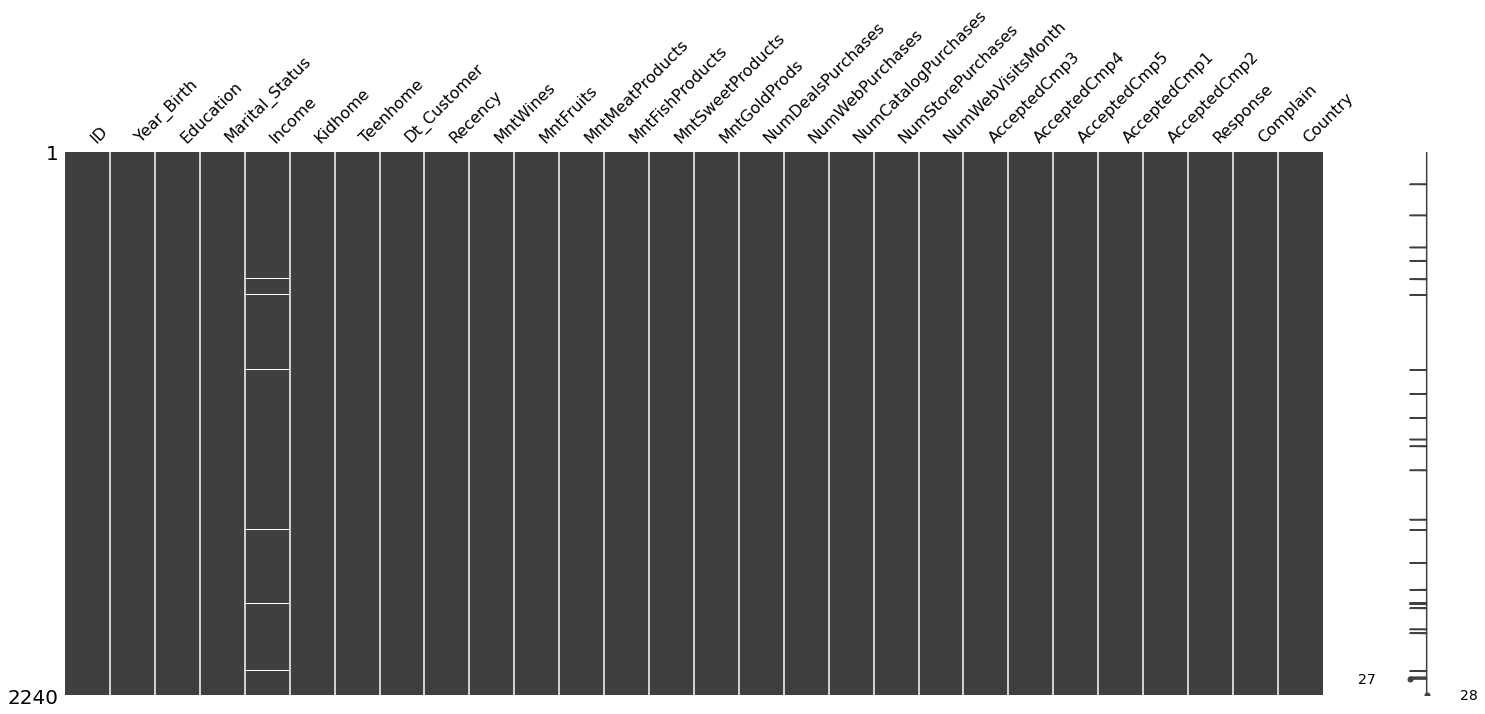

In [12]:
# matrix plot
msno.matrix(df)

Only few null values in the dataframe, so we can delete those rows or we can fill them by calculating median value.

In [13]:
# filling the null values using the median
df['Income'].fillna(df['Income'].median(), inplace = True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [14]:
# to get the unique values in each column
df.nunique() 

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [15]:
# which level of education people are more number of customers.
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [16]:
# which level of education people spent more income.
df[df['Income']==df['Income'].max()]['Education']

527    Graduation
Name: Education, dtype: object

In [17]:
# which level of education people has the highest number of visits monthly.
df[df['NumWebVisitsMonth']==df['NumWebVisitsMonth'].max()]['Education']

1466    Graduation
1533           PhD
1721           PhD
Name: Education, dtype: object

In [18]:
# which level of education people spend more amount on wines.
df[df['MntWines']==df['MntWines'].max()]['Education']

1293    PhD
Name: Education, dtype: object

### Visualization

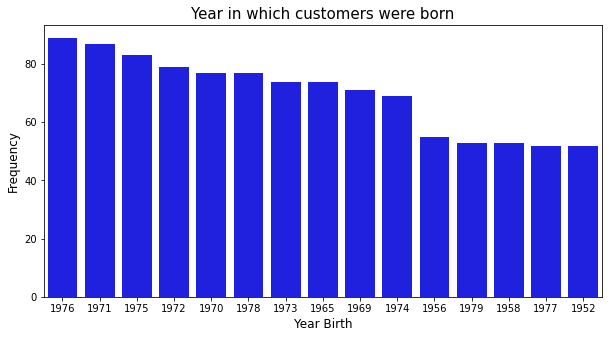

In [19]:
# Frequency of customers birth year
plt.figure(figsize=(10,5))

x = df["Year_Birth"].value_counts().iloc[:15].index
y = df["Year_Birth"].value_counts().iloc[:15].values

sns.barplot(x=x, y=y, order=x, color='blue')

plt.title("Year in which customers were born", fontsize=15)
plt.xlabel("Year Birth", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

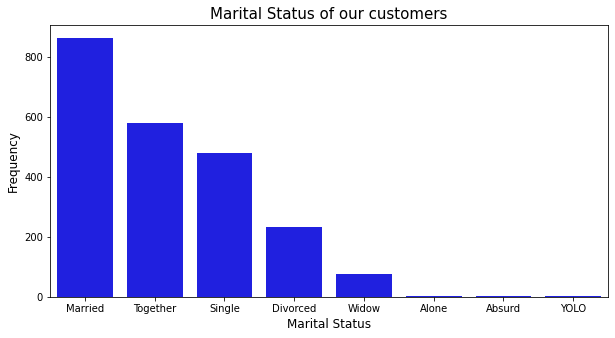

In [20]:
# Martial status of customers
plt.figure(figsize=(10,5))

x = df["Marital_Status"].value_counts().index
y = df["Marital_Status"].value_counts().values

sns.barplot(x=x, y=y, order=x, color='blue')

plt.title("Marital Status of our customers", fontsize=15)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

* Here Alone, Absurd and YOLO are fond to be anamolies, so we have to replace them to single status.

In [21]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

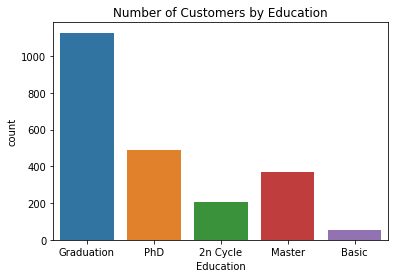

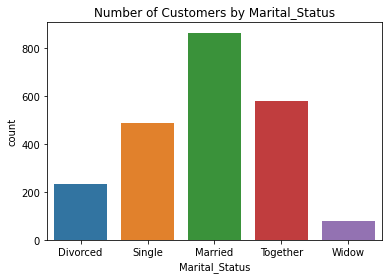

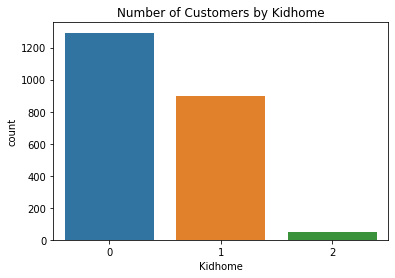

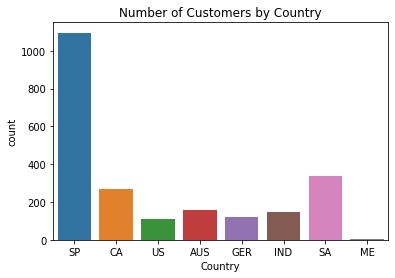

In [22]:
# https://www.kaggle.com/gregoriomgarcia/fork-of-notebookbf7d4af6b8/notebook
col = ["Education","Marital_Status", "Kidhome", "Country"]
for i in col:
    plt.figure()
    sns.countplot(df[i])
    plt.title(f"Number of Customers by {i}")


* More number of customers were high from spain, Graduation and Married

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

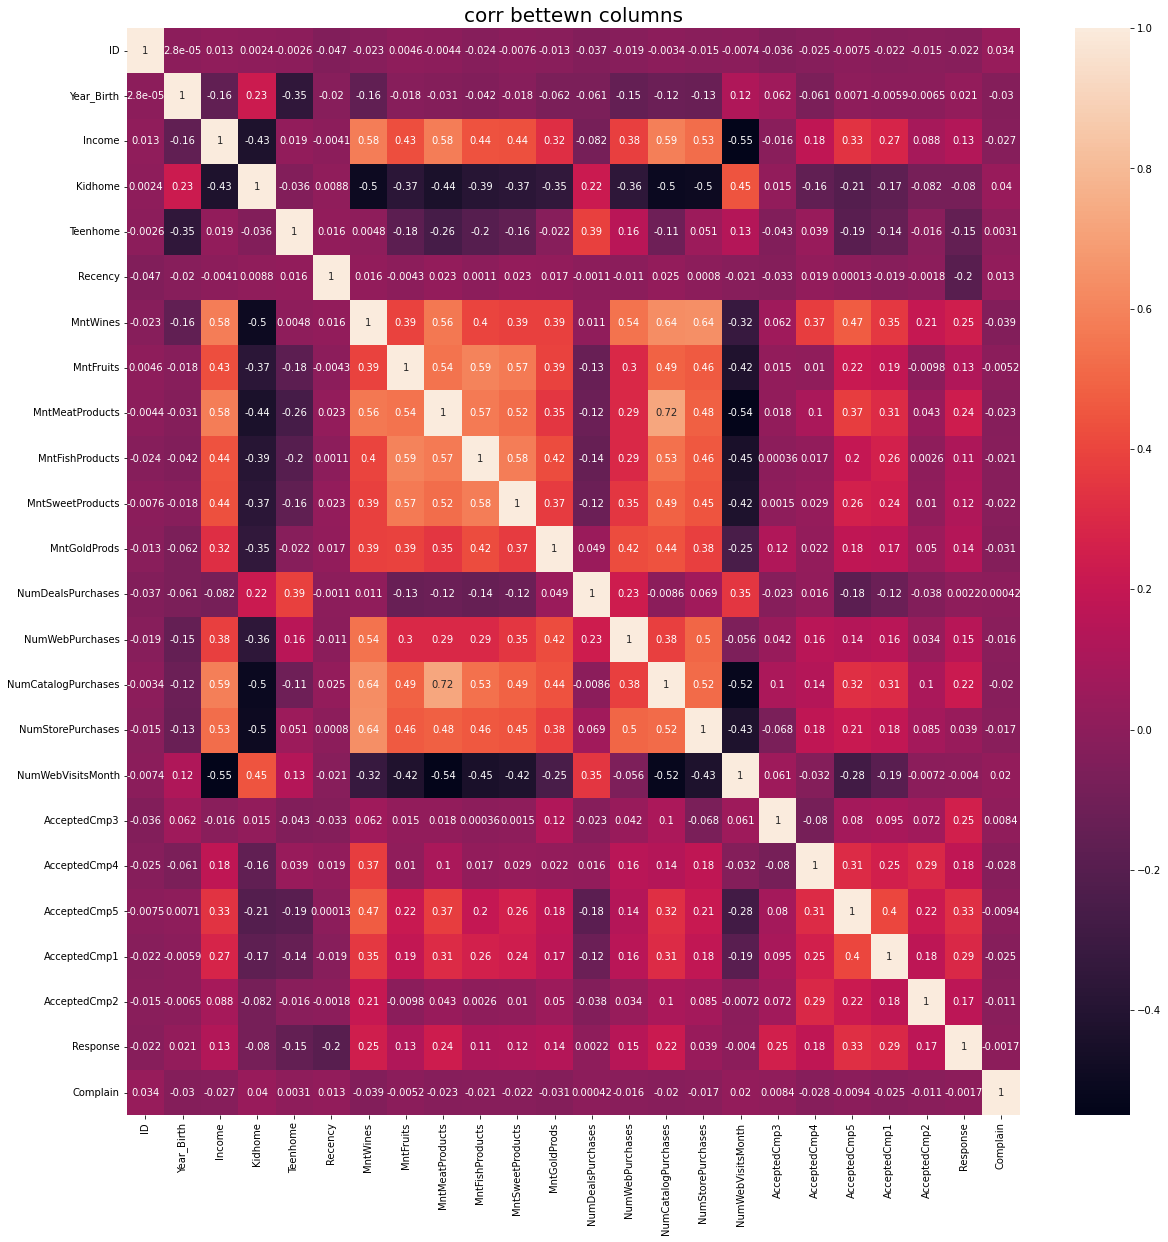

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.title("corr bettewn columns", fontsize=20)
plt.show()

* Here correlation between NumCatalogPurchases, MntMeatProducts adn MntWines is high

C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


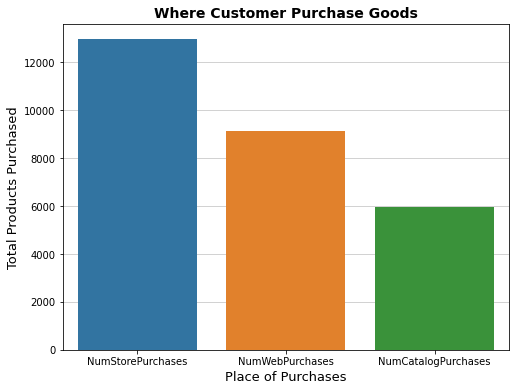

In [25]:
# Number of customers purchase goods in Online vs In-Store vs Catalog
df_col = ["NumStorePurchases", "NumWebPurchases","NumCatalogPurchases"]

fig, ax = plt.subplots(figsize=(8,6))
data = df[df_col].sum()
sns.barplot(data.index, data.values, ax=ax)

ax.set_title("Where Customer Purchase Goods", fontsize=14, fontweight='bold')
ax.set_ylabel("Total Products Purchased", fontsize=13)
ax.set_xlabel("Place of Purchases", fontsize=13)
ax.yaxis.grid(alpha=0.7)
ax.set_axisbelow(True)

* Here in-store shopping has huge demand compared to web and catalog

## Feature Engineering

In [26]:
# ID is unique, so we can drop ID col
df.drop(['ID'], axis=1, inplace =True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [28]:
# Total amount spent on different products
df["Spendings"] = df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [29]:
# Create products purchased field
df["Products_Purchased"] = df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]

In [30]:
# Create total children field
df["Total_Children"] = df["Kidhome"]+df["Teenhome"]

In [31]:
# Create age demographic field
# https://www.weforum.org/agenda/2015/09/how-different-age-groups-identify-with-their-generational-labels/
df["Age_Demographic"] = pd.cut(df["Year_Birth"], bins=[1900,1945,1964,1980,1996,2012], labels=["Silent Gen", "Baby Boomer", "Gen X","Millennial", "Gen Z"])

In [32]:
# Rename columns to get cleaner graph labels
df = df.rename(columns={"Amount_Spent":"Spendings", "Marital_Status":"Marital Status", "Products_Purchased":"Products Purchased", "Total_Children": "Total Children", "Age_Demographic": "Age Demographic"})

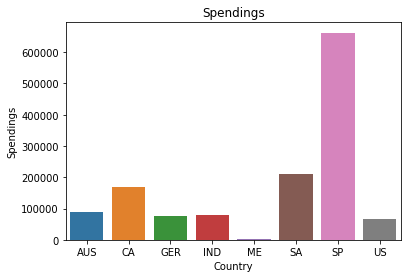

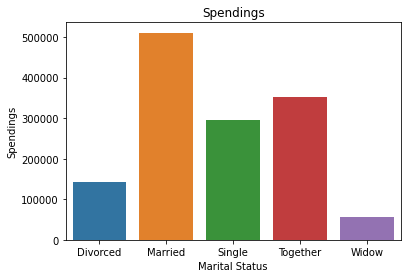

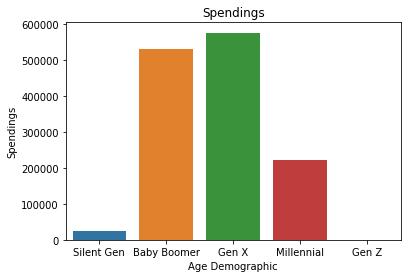

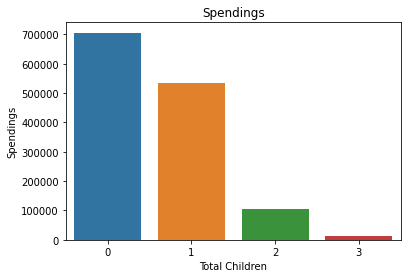

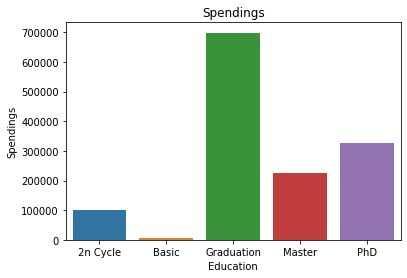

In [33]:
# Make a table showing amount and average spent grouped by each demographic using a for loop
# Make a list of customer demographic variables
new_variables = ["Country", "Marital Status","Age Demographic", "Total Children", "Education"]
for i in new_variables:
    res = df[[i, "Spendings"]].groupby(i).sum()
    for i in res.columns:
        plt.figure()
        sns.barplot(x=res.index,y=res[i])
        plt.title(f"{i}")

#### insights:
* Spain has the highest spendings
* Married people has huge amount of spendings
* Gen X and Graduate people's spendings were high.

C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


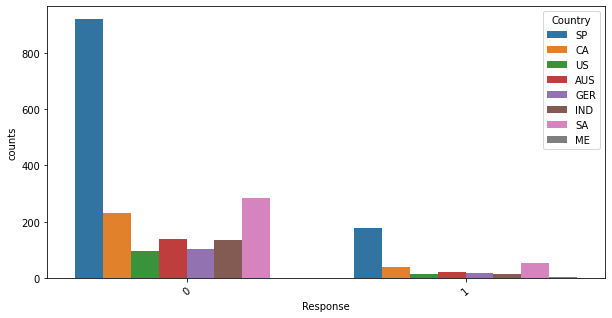

In [34]:
# responses from last campaing
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(df['Response'],hue=df['Country'],ax=ax)
plt.xlabel('Response')
plt.ylabel('counts')
plt.xticks(rotation=40)
plt.show()

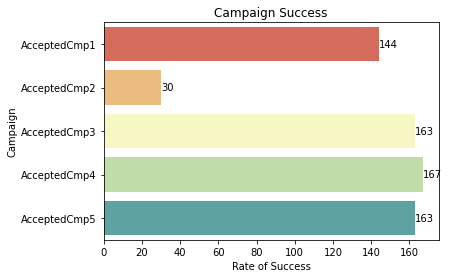

In [44]:
# https://www.kaggle.com/jiaminghe/regression-analysis-and-data-visualization
data_melted = pd.melt(df, value_vars = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],
                     var_name = 'cmp', value_name = 'success', ignore_index = True)

cmp_success = data_melted[data_melted['success'] == 1]

barplot = sns.barplot(y = 'cmp', x = 'success', data = cmp_success, ci = None, estimator = np.sum, palette = 'Spectral')
    
plt.title('Campaign Success')
plt.ylabel('Campaign')
plt.xlabel('Rate of Success')

barplot.bar_label(barplot.containers[0])
plt.show()

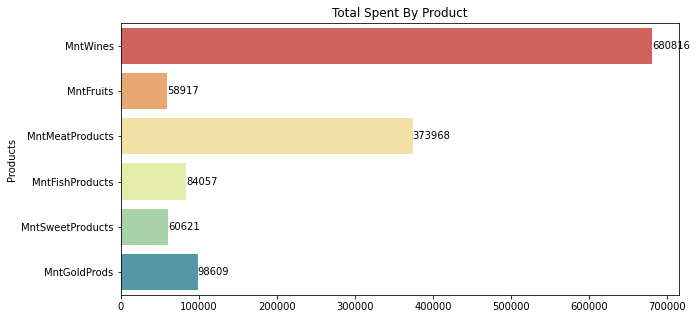

In [45]:
data_melted2 = pd.melt(df, value_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                      value_name = 'amount',
                      var_name = 'products',
                      ignore_index = True)

plt.figure(figsize = (10,5))
barplot1 = sns.barplot(y = 'products', x = 'amount', data = data_melted2, ci = None, estimator = np.sum, palette = 'Spectral')
    
plt.title('Total Spent By Product')
plt.ylabel('Products')
plt.xlabel('')

barplot1.bar_label(barplot1.containers[0])
plt.show()

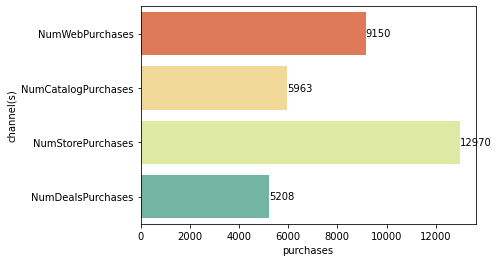

In [48]:
data_melted3 = pd.melt(df, value_vars = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],
                      var_name = 'channel(s)',
                      value_name = 'purchases',
                      ignore_index = True)

barplot2 = sns.barplot(y = 'channel(s)', x = 'purchases', data = data_melted3, ci = None, estimator = np.sum, palette = 'Spectral')

barplot2.bar_label(barplot2.containers[0])
plt.show()


#### Overall Analysis:
* Rate of success in campaign 4 is high followed by campaign 3 and 5 with same success rate.
* Amount spent on wine and Meat is high.
* products purchased in store is high followd by web.